<a href="https://colab.research.google.com/github/JeoungHojin/2024.DB/blob/main/harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

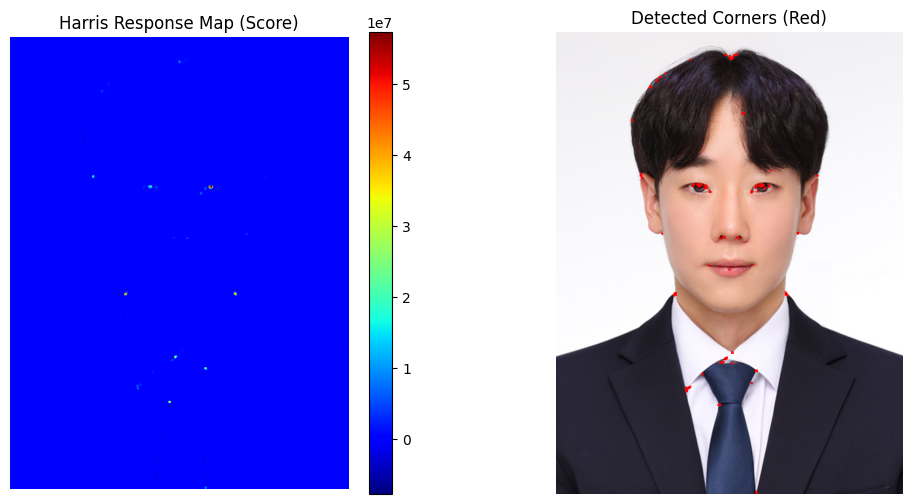

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(img_path):
    # 1. 이미지 로드
    img = cv2.imread(img_path)
    if img is None:
        print("이미지를 찾을 수 없습니다.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. 해리스 코너 적용을 위해 float32로 변환 (필수!)
    # 미분 계산 시 소수점이 나오기 때문입니다.
    gray_float = np.float32(gray)

    # 3. 해리스 코너 함수 실행
    # blockSize: 이웃 픽셀 범위 (2)
    # ksize: 소벨 미분 커널 크기 (3)
    # k: 해리스 파라미터 (보통 0.04)
    dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

    # 4. 결과 팽창 (Dilate) - 코너 점을 잘 보이게 두껍게 만듦
    dst = cv2.dilate(dst, None)

    # 5. 임계값 처리 및 시각화
    # 점수(dst)가 최대값의 1%보다 큰 경우만 코너로 인정 (빨간점 표시)
    img_result = img.copy()
    img_result[dst > 0.01 * dst.max()] = [0, 0, 255]

    # 시각화
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Harris Response Map (Score)")
    plt.imshow(dst, cmap='jet') # 점수가 높을수록 빨간색
    plt.colorbar()
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Detected Corners (Red)")
    plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# 실행
img_path = '/content/drive/MyDrive/사진/1611a.jpg'
harris_corner_detection(img_path)